# Describe the elevation of the star during the night

In [1]:
import urllib
import IPython.display
import numpy as np
import astropy

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time, TimeDelta,TimezoneInfo

In [4]:
from datetime import datetime
from pytz import timezone
import pytz
import pandas as pd

In [5]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [6]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

## Read the data from the fits file table


This file is a kind of logbook written in a fits format.
It includes the file number, the UTC time and the airmass for all the HD158485_grat_1-13
during the night 2016-05-10-11

In [7]:
tablefile_HD158485_PSF_with_AM='HD158485_grat_1-13_TablePSF_night20160510_withAM.fits'

In [8]:
t = Table.read(tablefile_HD158485_PSF_with_AM)

In [9]:
t.show_in_notebook()

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay,azimuth,altitude,airmass
,,,,,,,,,,,deg,deg,
1,AssScImHD158485_grat_1.fits,2016-05-11T05:58:59.852,1.5,32,4.59516684466,4.77633085449,0.669748518204,0.633033961784,4.33783750136,4.50885632664,38.9257769944,47.841071918,1.34900713748
2,AssScImHD158485_grat_2.fits,2016-05-11T05:59:35.430,1.5,20,4.36764093337,4.27710462183,0.253070362051,0.480219677255,4.1230530411,4.03758676301,38.9068895615,47.9173899634,1.34738332675
3,AssScImHD158485_grat_3.fits,2016-05-11T06:00:39.034,1.5,21,3.11745978946,3.37662120697,0.141785922328,0.291356294233,2.94288204125,3.18753041938,38.8723545592,48.0537476962,1.34449769692
4,AssScImHD158485_grat_4.fits,2016-05-11T06:04:28.397,5.0,44,3.20254070405,3.54157179463,0.253742310559,0.732325225588,3.02319842463,3.34324377413,38.7395151753,48.5445883273,1.33427416819
5,AssScImHD158485_grat_5.fits,2016-05-11T06:04:37.465,5.0,40,3.3337821852,3.69825493689,0.197919263153,0.712456743168,3.14709038283,3.49115266042,38.7339929203,48.5639643938,1.33387578357
6,AssScImHD158485_grat_6.fits,2016-05-11T06:04:46.678,5.0,51,3.22342719729,3.57597468963,0.22727713948,0.784218480413,3.04291527424,3.37572010701,38.7283610922,48.5836479006,1.33347147739
7,AssScImHD158485_grat_7.fits,2016-05-11T06:04:55.971,5.0,43,3.06221826786,3.54834731387,0.274848952559,0.794321902288,2.89073404486,3.34963986429,38.7226586174,48.6034998782,1.33306411825
8,AssScImHD158485_grat_8.fits,2016-05-11T06:05:04.595,5.0,50,3.20182477857,3.46410505349,0.518441965741,0.916487419153,3.02252259097,3.27011517049,38.7173471048,48.6219205101,1.33268649568
9,AssScImHD158485_grat_9.fits,2016-05-11T06:05:58.173,0.5,7,3.12579168451,3.48152512138,0.106598705227,0.0555052401655,2.95074735018,3.28655971458,38.683925444,48.7363135667,1.33034929618


In [10]:
all_airmass=t['airmass']
all_num=t['num']
all_times=Time(t['time'])

## Define Coordinates Systems

In [11]:
hd_158485_starloc=astropy.coordinates.SkyCoord.from_name('HD158485')

In [12]:
from astropy.coordinates import Longitude, Latitude
NOFS_Longitude=Longitude(u'-111°44′25″') 
NOFS_Latitude=Latitude(u'35°11′03″')
NOFS_Height=2.273*u.m 

In [13]:
#definition of the location to astropy
NOFS_location = astropy.coordinates.EarthLocation(lat=NOFS_Latitude, lon=NOFS_Longitude, height=NOFS_Height)

In [14]:
from astropy.coordinates import get_sun
utcoffset=utcoffset = -7*u.hour  # Mountain  Daylight Time
midnight = Time('2016-5-11 00:00:00') - utcoffset # midnight i UTC

delta_midnight_object_day=all_times-midnight

delta_midnight = np.linspace(-12, 12, 1000)*u.hour

times_May10_to_11 = midnight + delta_midnight
frame_May10_to_11 = AltAz(obstime=times_May10_to_11, location=NOFS_location)

sunaltazs_May10_to_11 = get_sun(times_May10_to_11).transform_to(frame_May10_to_11)

If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]
If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]


In [15]:
delta_midnight_object_hour=delta_midnight_object_day.to('hour')
delta_midnight_object_hour

<Quantity [-1.01670778,-1.006825  ,-0.98915722,-0.92544528,-0.92292639,
           -0.92036722,-0.91778583,-0.91539028,-0.9005075 ,-0.89928444,
           -0.89801   ,-0.89669972,-0.89542639] h>

In [16]:
hd_158485_altazs_May10_to_11 = hd_158485_starloc.transform_to(frame_May10_to_11 )

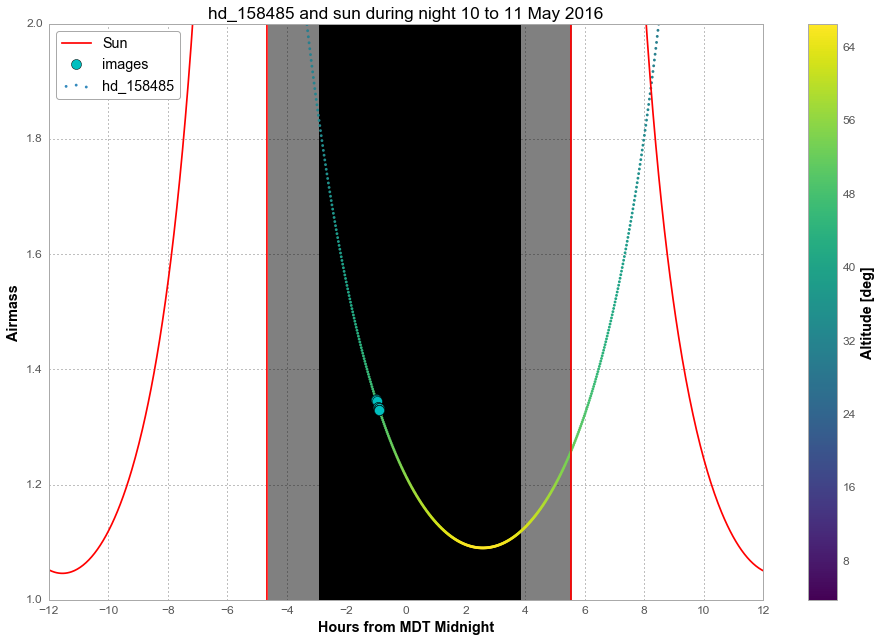

In [17]:
plt.figure(figsize=(16.,10.))
plt.plot(delta_midnight, sunaltazs_May10_to_11.secz, color='r', label='Sun')
plt.plot(delta_midnight_object_hour,all_airmass,marker='o',markersize='10',color='c',linestyle='None',label='images')
plt.scatter(delta_midnight, hd_158485_altazs_May10_to_11.secz,
            c=hd_158485_altazs_May10_to_11.alt, label='hd_158485', lw=0, s=8,
            cmap='viridis')

# plot astronomical twillight
plt.fill_between(delta_midnight.to('hr').value, 0, 2.,
                 sunaltazs_May10_to_11.alt < -0*u.deg, color='0.5', zorder=0)
#plot astronomical night
plt.fill_between(delta_midnight.to('hr').value, 0, 2.,
                 sunaltazs_May10_to_11.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Altitude [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(1., 2.)
plt.title('hd_158485 and sun during night 10 to 11 May 2016')
plt.xlabel('Hours from MDT Midnight')
plt.ylabel('Airmass')
plt.savefig('hd_158485_airmass_night20160510.pdf')
plt.show()